In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('STOCK.csv' , parse_dates=['Date'] , index_col='Date')


df.head()

,APPLE,MICROSOFT
Date,,
2020-01-02,73.152649,154.779556
2020-01-03,72.441460,152.852249
2020-01-06,73.018684,153.247330
2020-01-07,72.675278,151.850067
2020-01-08,73.844345,154.268784


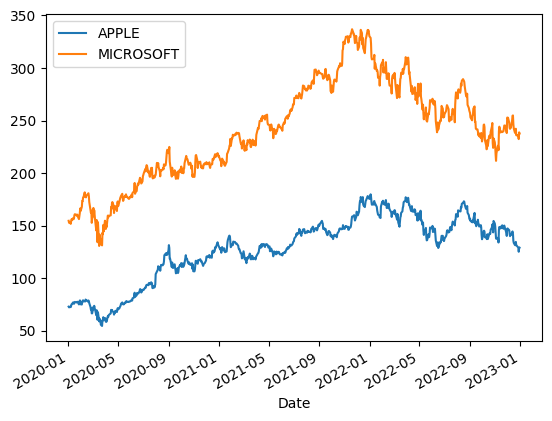

In [8]:
df.plot()
plt.show()

In [9]:
corr = df['APPLE'].corr(df['MICROSOFT'])

print("Correlation between the stock prices:", corr)

Correlation between the stock prices: 0.9169875068689327


In [10]:
df_weekly = df.resample(rule='W').mean()


df_weekly

,APPLE,MICROSOFT
Date,,
2020-01-05,72.797054,153.815903
2020-01-12,74.106908,154.207117
2020-01-19,76.718335,158.395096
2020-01-26,77.439882,159.954273
2020-02-02,77.176714,161.657974
...,...,...
2022-12-04,145.096982,247.196133
2022-12-11,142.262827,244.335495
2022-12-18,140.053171,249.854565


In [11]:
returns = df_weekly.pct_change()

returns

,APPLE,MICROSOFT
Date,,
2020-01-05,NaN,NaN
2020-01-12,0.017993,0.002543
2020-01-19,0.035239,0.027158
2020-01-26,0.009405,0.009844
2020-02-02,-0.003398,0.010651
...,...,...
2022-12-04,-0.022997,0.015682
2022-12-11,-0.019533,-0.011572
2022-12-18,-0.015532,0.022588


In [12]:
ret = returns['APPLE'].autocorr()

print("The autocorrelation of weekly return is {:.4f}".format(ret))

The autocorrelation of weekly return is 0.2369


[ 1.          0.23613535  0.01645058  0.07054789  0.04430914 -0.0857542
 -0.04747128 -0.04234692 -0.05621597 -0.09139875  0.01039516  0.00821187
 -0.10010128  0.00233105 -0.01264779  0.05185334  0.13171516  0.17475645
  0.02981681 -0.11154294 -0.06504512  0.03718933]


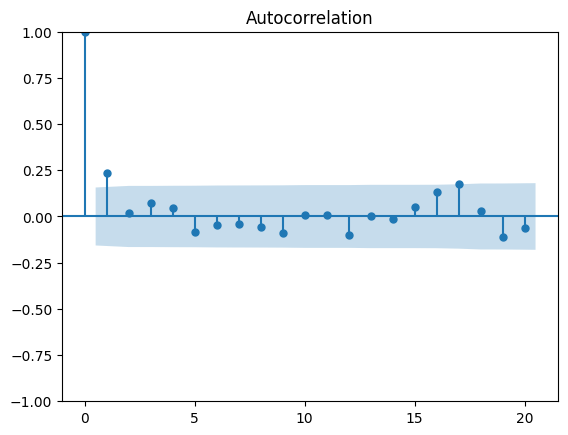

In [13]:
from statsmodels.graphics.tsaplots import  plot_acf
from statsmodels.tsa.stattools import  acf

returns.dropna(inplace= True)
print(acf(returns[['APPLE']]))
plot_acf(returns[['APPLE']], lags=20, alpha=0.05)
plt.show()



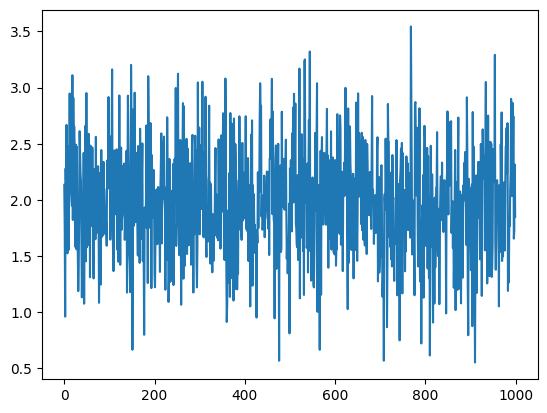

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

# White noise with mean=2 and standard deviation=0.5
wn = np.random.normal(loc=2, scale=0.5, size=1000)
plt.plot(wn)

The mean is 1.9907 and the standard deviation is 0.4821


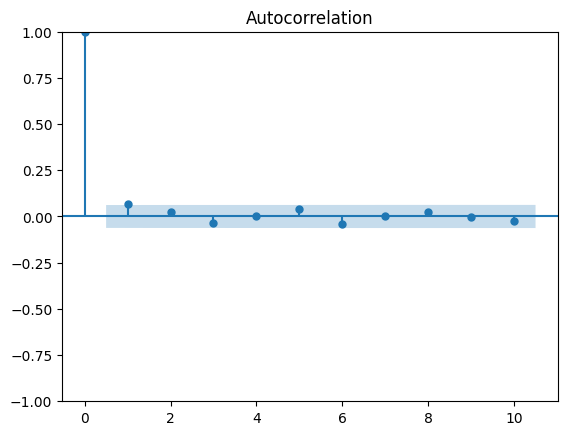

In [15]:
# Check mean and standard deviation
mean = np.mean(wn)
std = np.std(wn)
print("The mean is {:.4f} and the standard deviation is {:.4f}".format(mean, std))

plot_acf(wn, lags=10)
plt.show()

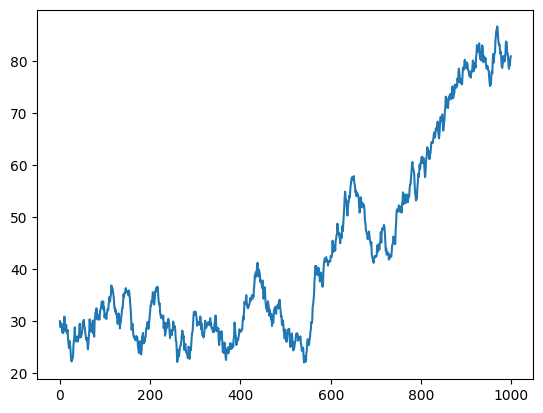

In [16]:
# Generate 1000 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=1000)

# Set first element to 0 so 
steps[0]=0

# Simulate the random walk
# Consider the starting point as 30
rw = 30 + np.cumsum(steps)

plt.plot(rw)
plt.show()

In [17]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

result = adfuller(rw)
print("Test Statistic:", result[0])
print("P-value:", result[1])
print("Critical Values:", result[4])

Test Statistic: 0.13856814098620637
P-value: 0.9685977856389798
Critical Values: {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573}


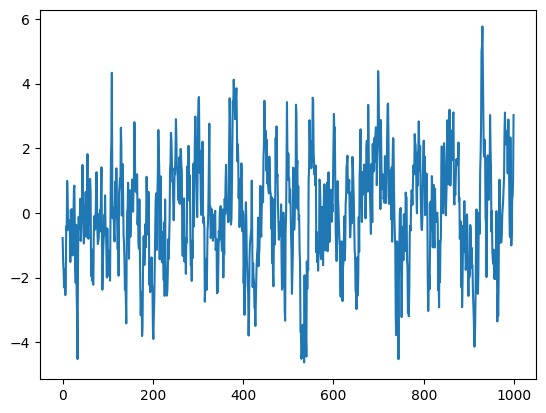

In [18]:
# Import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# AR model with parameter = +0.8
ar = np.array([1, -0.8])
ma = np.array([1])

AR_object = ArmaProcess(ar, ma)

simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)
plt.show()

In [19]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the simulated data
mod = ARIMA(simulated_data, order=(1,0,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for phi
print("When the true phi=0.8, the estimate of phi is:")
print(res.params[1])


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1422.280
Date:                Mon, 20 May 2024   AIC                           2850.560
Time:                        11:30:23   BIC                           2865.283
Sample:                             0   HQIC                          2856.156
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0114      0.158     -0.072      0.942      -0.320       0.297
ar.L1          0.7986      0.019     42.497      0.000       0.762       0.835
sigma2         1.0057      0.045     22.243      0.0

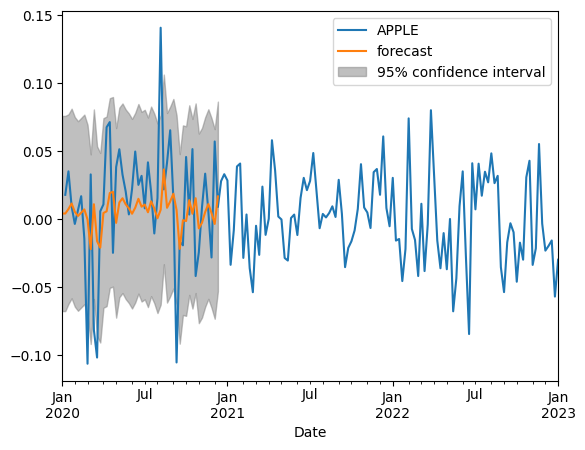

In [20]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Import plot_predict
from statsmodels.graphics.tsaplots import plot_predict

# Prepare data for estimating an AR model (resampling and computing percentage change)
# Convert the daily data to weekly data
df_weekly = df.resample(rule='W').mean()
returns = df_weekly.pct_change()
data = returns['APPLE']

# Fit an AR model
mod = ARIMA(data, order=(1,0,0))
res = mod.fit()

# Forcast using an AR(1) model
fig, ax = plt.subplots()
data.plot(ax=ax)
plot_predict(res, start=0, end='2020-12-13', alpha=0.05, ax=ax)
plt.show()

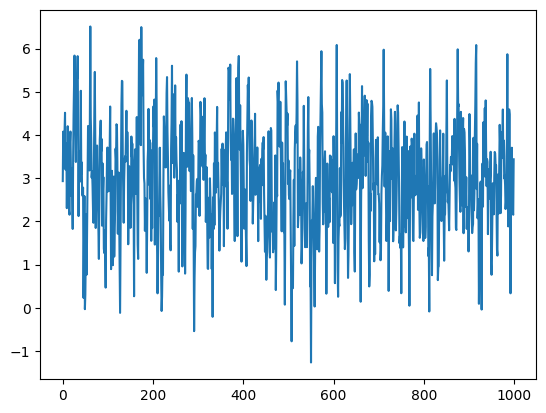

In [21]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Define MA parameters; MA parameter = [+0.6, +0.3]
ar = np.array([1])
ma = np.array([1, +0.6, +0.3])
mean = 3
MA_object = ArmaProcess(ar, ma)
data_ma = MA_object.generate_sample(nsample=1000) + mean

# Plot data
plt.plot(data_ma)
plt.show()

In [22]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an MA(2) model to the simulated data
mod = ARIMA(data_ma, order=(0, 0, 2))
ma_model= mod.fit()

# Show summary information on the fit
print(ma_model.summary())

# Print the estimate for the constant and for theta
print('''The estimate for mean is {:.4f}, 
         the estimate for theta_1 is {:.4f},
         the estimate for theta_2 is {:.4f},
      '''.format(ma_model.params[0], ma_model.params[1], ma_model.params[2]))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1433.978
Date:                Mon, 20 May 2024   AIC                           2875.955
Time:                        11:39:05   BIC                           2895.586
Sample:                             0   HQIC                          2883.416
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9801      0.061     48.536      0.000       2.860       3.100
ma.L1          0.6151      0.030     20.215      0.000       0.555       0.675
ma.L2          0.2859      0.030      9.505      0.0

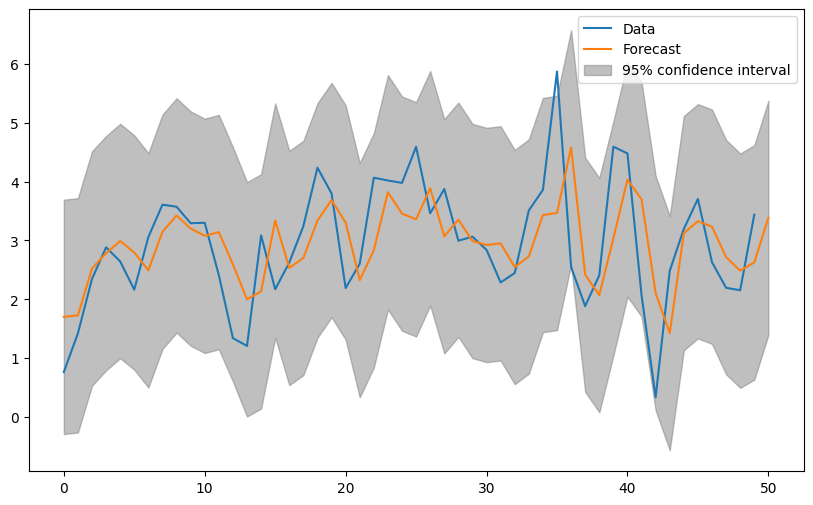

In [23]:
# Import the plot_predict from statsmodels
from statsmodels.graphics.tsaplots import plot_predict

# Plot the data and the forcast
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data_ma[950:], label='Data' )
plot_predict(ma_model, start=950, end=1000, ax=ax)
plt.legend(['Data', 'Forecast', '95% confidence interval'])
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1413.595
Date:                Mon, 20 May 2024   AIC                           2837.189
Time:                        11:49:50   BIC                           2861.728
Sample:                             0   HQIC                          2846.516
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0641      0.063     -1.015      0.310      -0.188       0.060
ar.L1         -0.2848      0.051     -5.620      0.000      -0.384      -0.185
ar.L2          0.4912      0.028     17.401      0.0

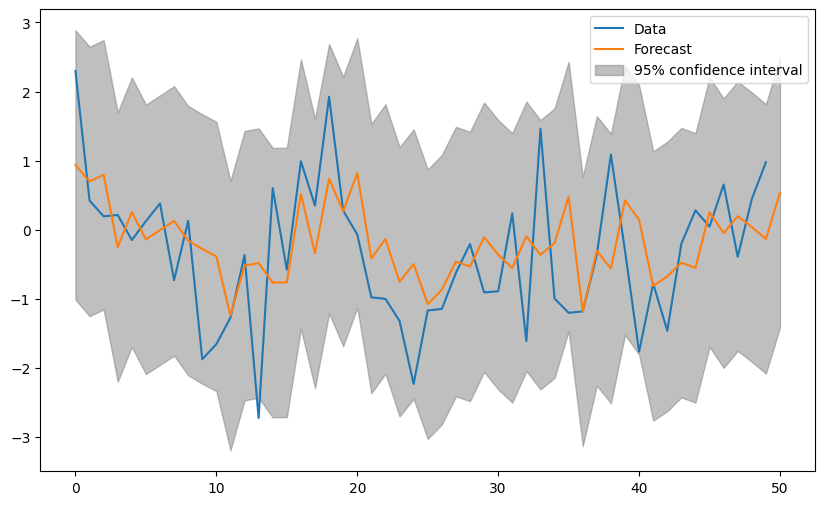

In [24]:
 from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Simulate an ARMA time series
# Define ARMA parameters; MA parameter = +0.6; AR parameter = [-0.3, 0.5]
ar = np.array([1, +0.3, -0.5])
ma = np.array([1, +0.6])
ARMA_object = ArmaProcess(ar, ma)
arma_data = ARMA_object.generate_sample(nsample=1000) 

# Estimate an ARMA model
mod = ARIMA(arma_data, order=(2, 0, 1))
arma_model= mod.fit()
print(arma_model.summary())

# Forecast
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(arma_data[950:], label='Data' )
plot_predict(arma_model, start=950, end=1000, ax=ax)
plt.legend(['Data', 'Forecast', '95% confidence interval'])
plt.show()

In [25]:
mod = ARIMA(arma_data, order=(2, 0, 1))
arma_model= mod.fit()
arma_model.bic

2861.727836956024

In [28]:
# Load the data
data = pd.read_csv('STOCK.csv', parse_dates=['Date'], index_col='Date')  

# Inspect the data
print(data.head())

# Specify the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Replace p, d, q with the order of your ARIMA model
order = (2, 1, 2)  
model = ARIMA(endog=data['APPLE'], order=order)

# Fit the model
results = model.fit()

# Print model summary
print(results.summary())

                APPLE   MICROSOFT
Date                             
2020-01-02  73.152649  154.779556
2020-01-03  72.441460  152.852249
2020-01-06  73.018684  153.247330
2020-01-07  72.675278  151.850067
2020-01-08  73.844345  154.268784


C:\Users\kacsa\anaconda3\envs\SQL_environment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kacsa\anaconda3\envs\SQL_environment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kacsa\anaconda3\envs\SQL_environment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  APPLE   No. Observations:                  756
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1833.934
Date:                Mon, 20 May 2024   AIC                           3677.867
Time:                        11:57:11   BIC                           3701.001
Sample:                             0   HQIC                          3686.779
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9860      0.235      4.196      0.000       0.525       1.447
ar.L2         -0.7705      0.167     -4.621      0.000      -1.097      -0.444
ma.L1         -1.0315      0.238     -4.335      0.0

# YT tutorial

In [31]:
df = pd.read_csv('airline-passengers.csv' , parse_dates=['Month'] , index_col='Month')

In [32]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [33]:
df.dtypes

Passengers    int64
dtype: object

<Axes: xlabel='Month'>

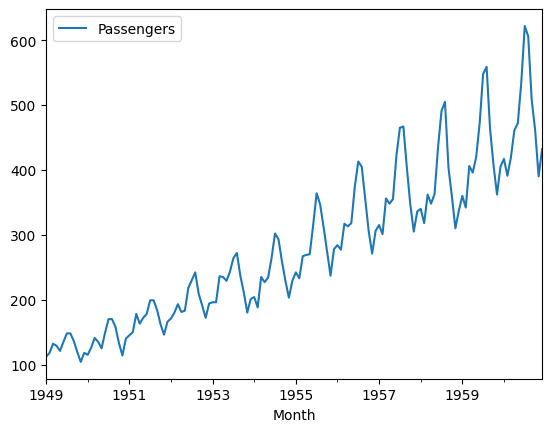

In [36]:
df.plot()

In [38]:
from statsmodels.tsa.seasonal import  seasonal_decompose

decomposed = seasonal_decompose(df , model='additive')

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

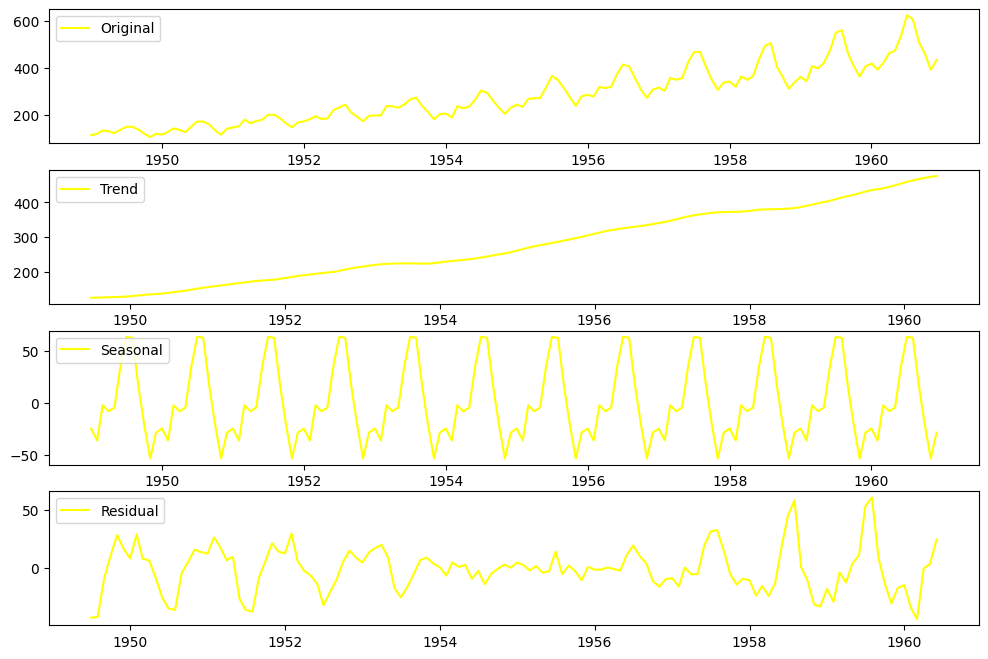

In [40]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df, label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

In [41]:
from pmdarima.arima import auto_arima


arima_model = auto_arima(df['Passengers'], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)           

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.34 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.60 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.03 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.24 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=2.08 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.12 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.36 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.28 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.16 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [42]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 20 May 2024   AIC                           1019.178
Time:                                     12:17:02   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 20 May 2024   AIC                           1019.178
Time:                                     12:19:47   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

C:\Users\kacsa\anaconda3\envs\SQL_environment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kacsa\anaconda3\envs\SQL_environment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Train Score: 16.14 RMSE
Test Score: 29.46 RMSE


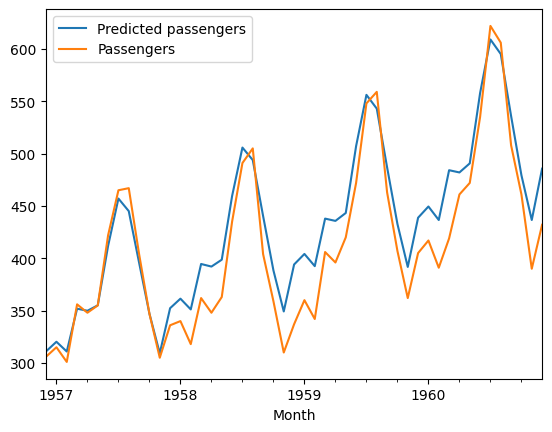

In [44]:
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.
# Model: SARIMAX(0, 1, 1)x(2, 1, [], 12)

#Split data into train and test
size = int(len(df) * 0.66)
X_train, X_test = df[0:size], df[size:len(df)]

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(X_train['Passengers'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 


#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 

#Prediction
start_index = len(X_train)
end_index = len(df)-1
prediction = result.predict(start_index, end_index).rename('Predicted passengers') 
#Rename the column

# plot predictions and actual values 
prediction.plot(legend = True) 
X_test['Passengers'].plot(legend = True) 


import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(X_train, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(X_test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

#from sklearn.metrics import r2_score
#score = r2_score(X_test, prediction)
#print("R2 score is: ", score)


  


In [45]:
#Forecast.. You can re-train on the entire dataset before forecasting
#For now let us use the trained model
# Forecast for the next 3 years 
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 

C:\Users\kacsa\anaconda3\envs\SQL_environment\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


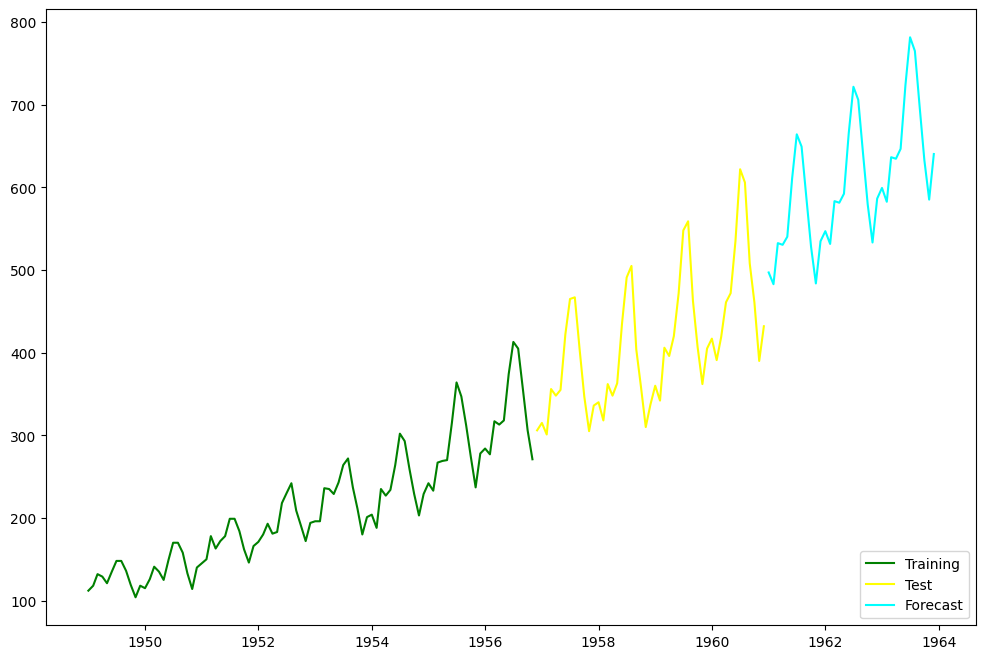

In [47]:
plt.figure(figsize=(12,8))
plt.plot(X_train, label='Training', color='green')
plt.plot(X_test, label='Test', color='yellow')
plt.plot(forecast, label='Forecast', color='cyan')
plt.legend(loc='lower right')
plt.show()
